In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from paretoset import paretoset
# import pygmo2 as pg
import os
# from pymoo.factory import *

In [3]:
os.getcwd() # check current directory

'/rst1_data/workspace3/kitada.r/DEFramework/DEFramework2/post/adaptivesearch'

In [4]:
pop = 100
ngen = 100

nobj = 3
ncon = 0
nvar = 1000

ntrial = 5

frequency = 10 # frequency of accumulation [gen]

In [5]:
base_path = '../../output/basic_sample2/various1000/'

In [65]:
algorithmName = ['NSGAII',"NSGAIII","MOEAD"]
problemName = ["DTLZ2",'DTLZ3', 'DTLZ4',"wfg2","wfg6"]

In [7]:
gs = [i for i in range(0, ngen, frequency)]

In [8]:
# Generate mesh
angle = np.linspace(0, 0.5 * np.pi, 16)
theta, phi = np.meshgrid(angle, angle)
r = 1
X = r * np.cos(phi) * np.cos(theta)
Y = r * np.cos(phi) * np.sin(theta)
Z = r * np.sin(phi)

In [9]:
def makeFileName(header, algorithm, problem, trial, extension):
    if header == '':
        if trial == '':
            return '_'.join([algorithm, problem]) + '.' + extension
        else:
            return '_'.join([algorithm, problem, str(trial)]) + '.' + extension
    else:
        if trial == '':
            return '_'.join([header, algorithm, problem]) + '.' + extension
        else:
            return '_'.join([header, algorithm, problem, str(trial)]) + '.' + extension

In [10]:
def readHitoryData(aName, pName,  trial):
    fname = '/'.join(
        [base_path, pName,  makeFileName('history', aName, pName, str(trial), 'txt')]
    )
    df = pd.read_csv(fname, delimiter=' ', header=None, names=colnames)
    return df

In [21]:
# ファイルをリストに出力
file = open('../../output/basic_sample2/various1000/DTLZ4/MOEAD/0/history_correlation.csv', 'r')
f_list = file.readlines()
file.close()

# リストから1行ずつ読み込む
for f_line in f_list:
    print(f_line)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# 相関係数 推移図

In [91]:
df = pd.read_csv("../../output/basic_sample2/various1000/DTLZ4/NSGAIII/0/history_correlation.csv", header=0, index_col=0, encoding="SHIFT-JIS")

In [92]:
# 各相関係数ごとの平均を計算して、csvファイルに昇順で出力c
print(df.mean().sort_values(ascending=False))
df.mean().sort_values(ascending=False).to_csv("../../output/basic_sample2/various1000/wfg6/NSGAIII/0/correlationmean.csv")
dfmean=df.mean().sort_values(ascending=False)


ITE              49.500000
v383 and v895     0.312598
v28 and v275      0.285702
v546 and v799     0.284579
v34 and v806      0.272950
                   ...    
v494 and v618    -0.143098
v513 and v946    -0.150809
v29 and v471     -0.151307
v439 and v817    -0.152266
v347 and v727    -0.158720
Length: 499501, dtype: float64


In [93]:
#上位　５つの平均相関係数を取得
arrays=[]
arrays=dfmean.index[1:10]
arrays=arrays.to_numpy().tolist()
arrays


['v383 and v895',
 'v28 and v275',
 'v546 and v799',
 'v34 and v806',
 'v131 and v936',
 'v588 and v868',
 'v105 and v369',
 'v510 and v743',
 'v50 and v879']

ITE              49.500000
v383 and v895     0.312598
v28 and v275      0.285702
v546 and v799     0.284579
v34 and v806      0.272950
v131 and v936     0.272946
dtype: float64
['v383 and v895', 'v28 and v275', 'v546 and v799', 'v34 and v806', 'v131 and v936', 'v588 and v868', 'v105 and v369', 'v510 and v743', 'v50 and v879']


<Figure size 432x288 with 0 Axes>

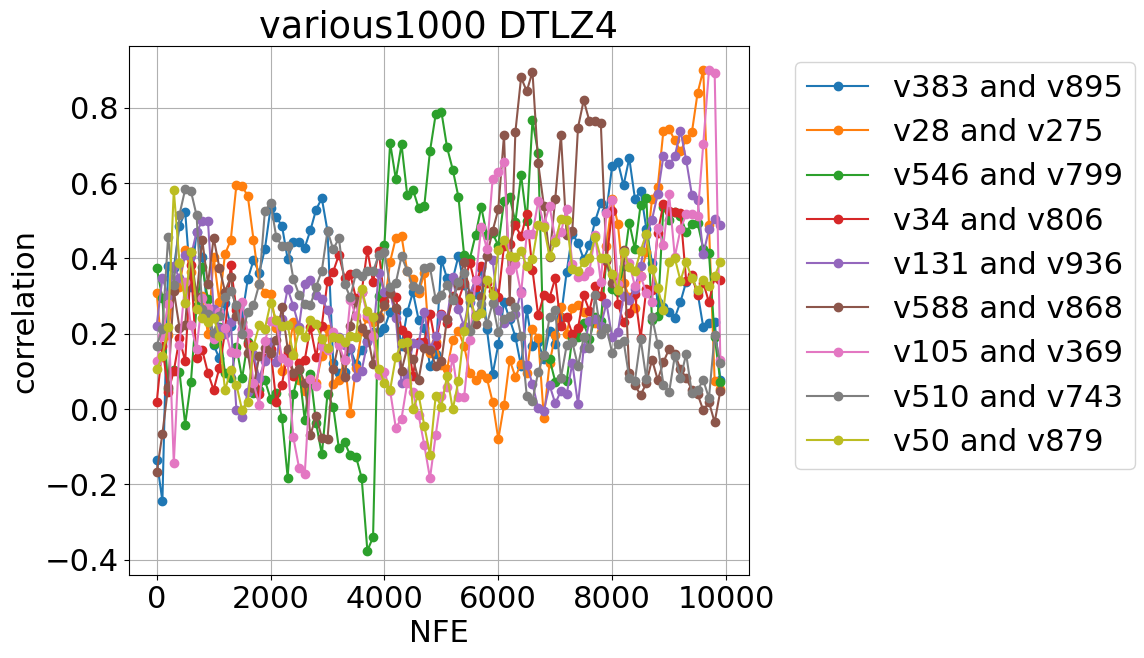

In [94]:
NFE=[]
plt.clf()
i=0
for i in range(100):
    NFE.append(i*100)

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size
j=0

print(dfmean[0:6])
print(arrays)
for array in arrays:
#     for j in range(100):
    plt.plot(NFE, df[str(array)].to_numpy().tolist(), marker='o',label=str(array),linestyle="solid")
    j=j+1

plt.title("various1000 DTLZ4")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('NFE')
plt.ylabel('correlation')
plt.show()

ITE              49.500000
v231 and v997     0.744946
v915 and v997     0.736517
v915 and v998     0.734989
v231 and v521     0.732922
v521 and v997     0.732564
dtype: float64
['v231 and v997', 'v915 and v997', 'v915 and v998', 'v231 and v521', 'v521 and v997', 'v231 and v915', 'v997 and v998', 'v896 and v915', 'v173 and v997']


<Figure size 432x288 with 0 Axes>

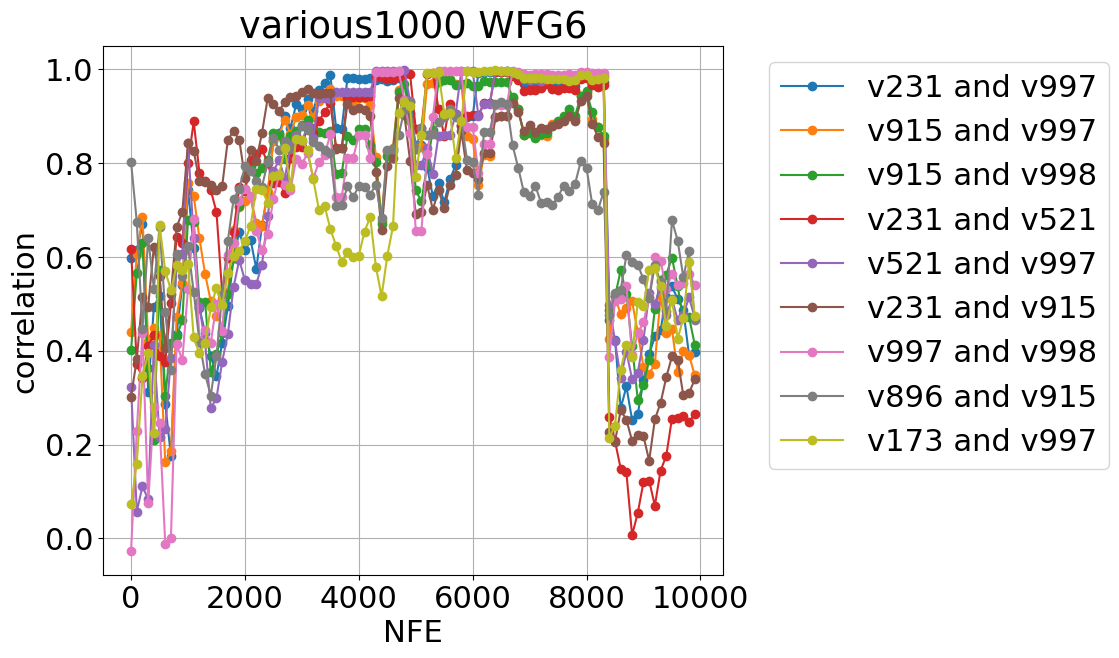

In [44]:
NFE=[]
plt.clf()
i=0
for i in range(100):
    NFE.append(i*100)

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size
j=0

print(dfmean[0:6])
print(arrays)
for array in arrays:
#     for j in range(100):
    plt.plot(NFE, df[str(array)].to_numpy().tolist(), marker='o',label=str(array),linestyle="solid")
    j=j+1

plt.title("various1000 DTLZ4")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('NFE')
plt.ylabel('correlation')
plt.show()

ITE              49.500000
v369 and v599     0.338527
v355 and v599     0.323163
v53 and v965      0.322703
v16 and v53       0.322585
v12 and v985      0.309062
dtype: float64
['v369 and v599', 'v355 and v599', 'v53 and v965', 'v16 and v53', 'v12 and v985', 'v417 and v567', 'v134 and v599', 'v909 and v997', 'v837 and v965']


<Figure size 432x288 with 0 Axes>

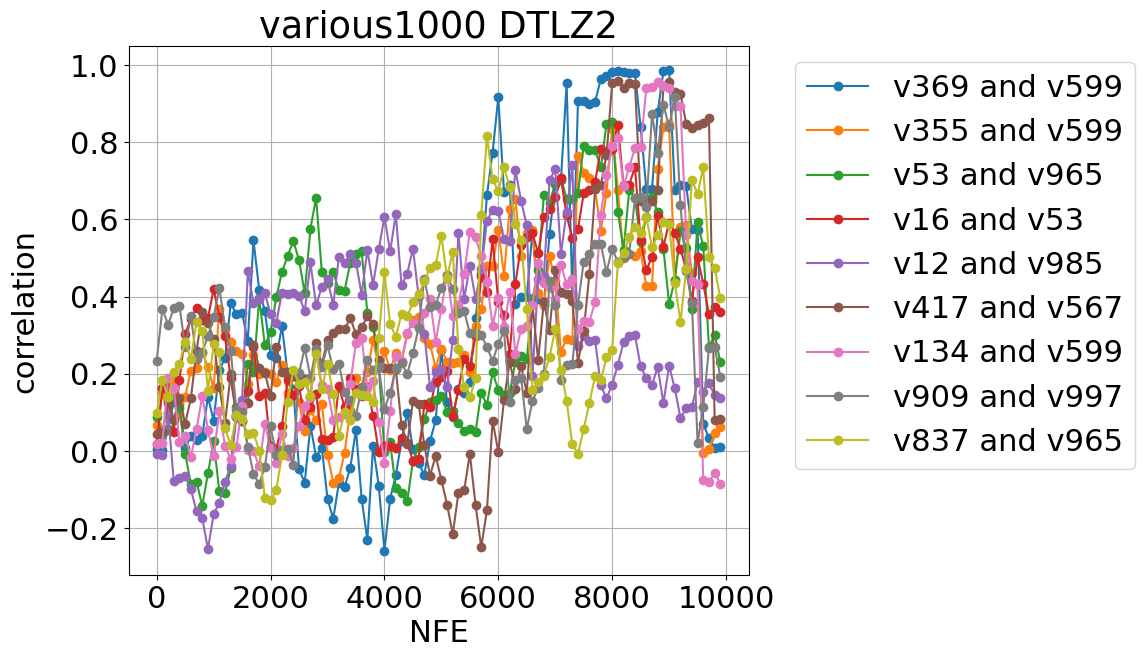

In [19]:
NFE=[]
plt.clf()
i=0
for i in range(100):
    NFE.append(i*100)

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size
j=0

print(dfmean[0:6])
print(arrays)
for array in arrays:
#     for j in range(100):
    plt.plot(NFE, df[str(array)].to_numpy().tolist(), marker='o',label=str(array),linestyle="solid")
    j=j+1

plt.title("various1000 DTLZ2")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('NFE')
plt.ylabel('correlation')
plt.show()

ITE              49.500000
v266 and v889     0.957576
v744 and v944     0.956022
v10 and v744      0.955154
v610 and v632     0.954899
v740 and v801     0.954266
dtype: float64


<Figure size 432x288 with 0 Axes>

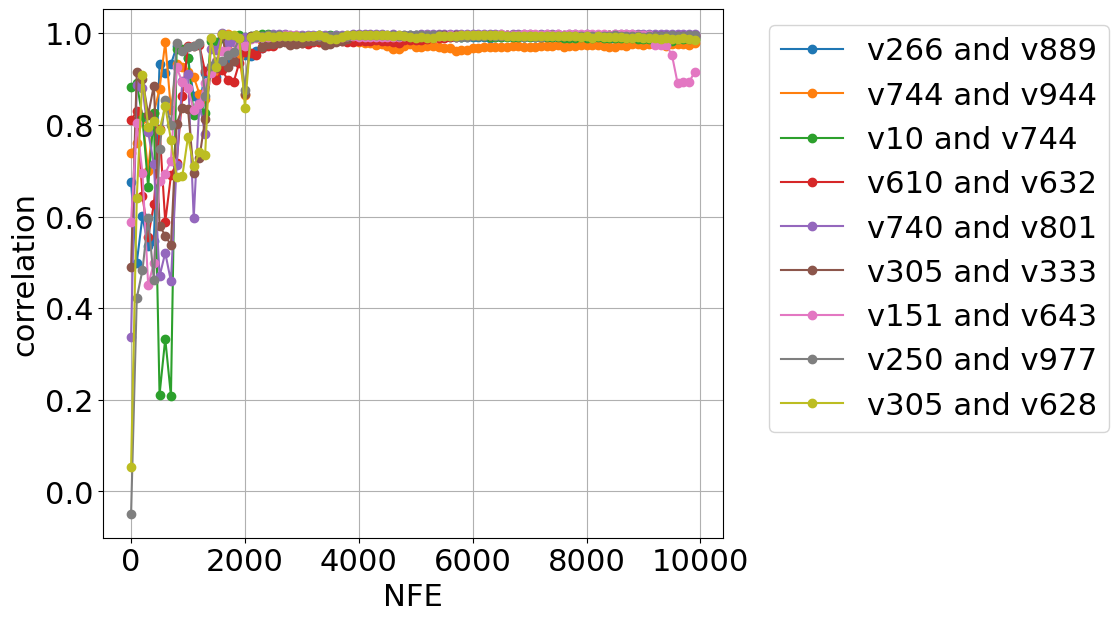

In [304]:
NFE=[]
plt.clf()
i=0
for i in range(100):
    NFE.append(i*100)

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size
j=0

print(dfmean[0:6])

for array in arrays:
#     for j in range(100):
    plt.plot(NFE, df[str(array)].to_numpy().tolist(), marker='o',label=str(array),linestyle="solid")
    j=j+1

plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('NFE')
plt.ylabel('correlation')
plt.show()

ITE              49.500000
v511 and v983     0.381131
v7 and v256       0.361603
v552 and v923     0.351815
v369 and v538     0.345213
v756 and v999     0.344791
dtype: float64


<Figure size 432x288 with 0 Axes>

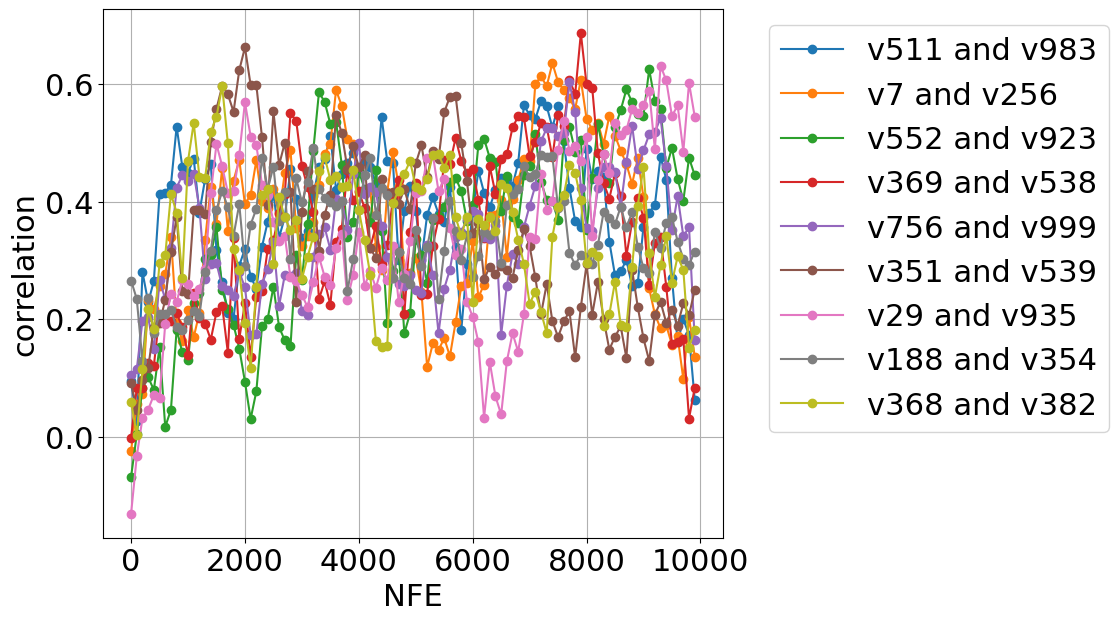

In [297]:
NFE=[]
plt.clf()
i=0
for i in range(100):
    NFE.append(i*100)

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size
j=0

print(dfmean[0:6])

for array in arrays:
#     for j in range(100):
    plt.plot(NFE, df[str(array)].to_numpy().tolist(), marker='o',label=str(array),linestyle="solid")
    j=j+1

plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('NFE')
plt.ylabel('correlation')
plt.show()

ITE              49.500000
v231 and v997     0.744946
v915 and v997     0.736517
v915 and v998     0.734989
v231 and v521     0.732922
v521 and v997     0.732564
dtype: float64


<Figure size 432x288 with 0 Axes>

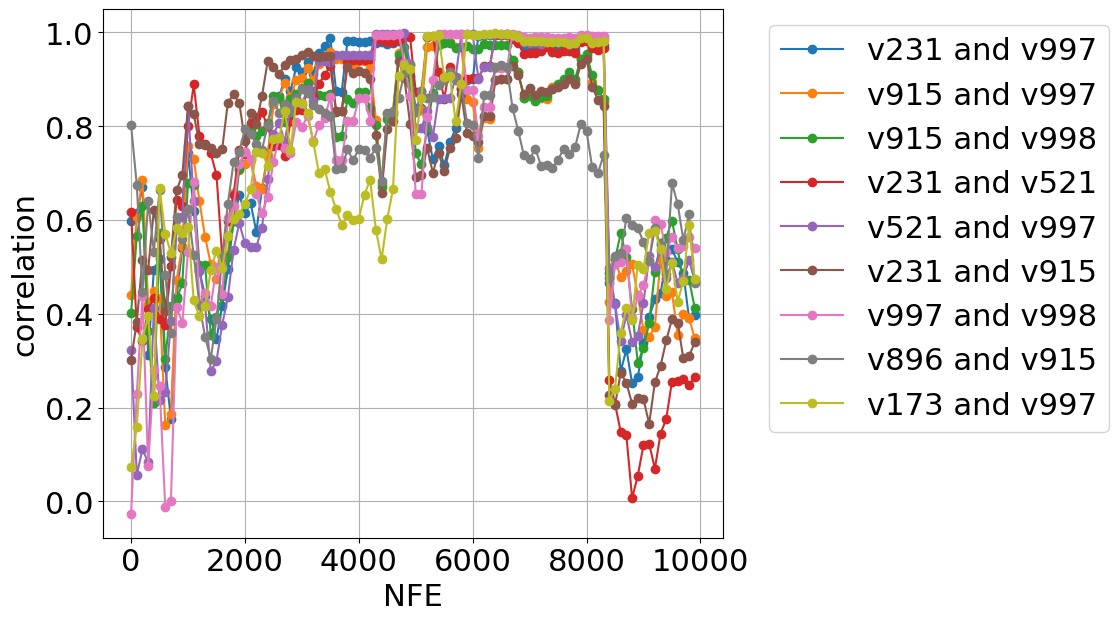

In [292]:
NFE=[]
plt.clf()
i=0
for i in range(100):
    NFE.append(i*100)

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size
j=0

print(dfmean[0:6])

for array in arrays:
#     for j in range(100):
    plt.plot(NFE, df[str(array)].to_numpy().tolist(), marker='o',label=str(array),linestyle="solid")
    j=j+1

plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('NFE')
plt.ylabel('correlation')
plt.show()

ITE              49.500000
v369 and v599     0.338527
v355 and v599     0.323163
v53 and v965      0.322703
v16 and v53       0.322585
v12 and v985      0.309062
dtype: float64


<Figure size 432x288 with 0 Axes>

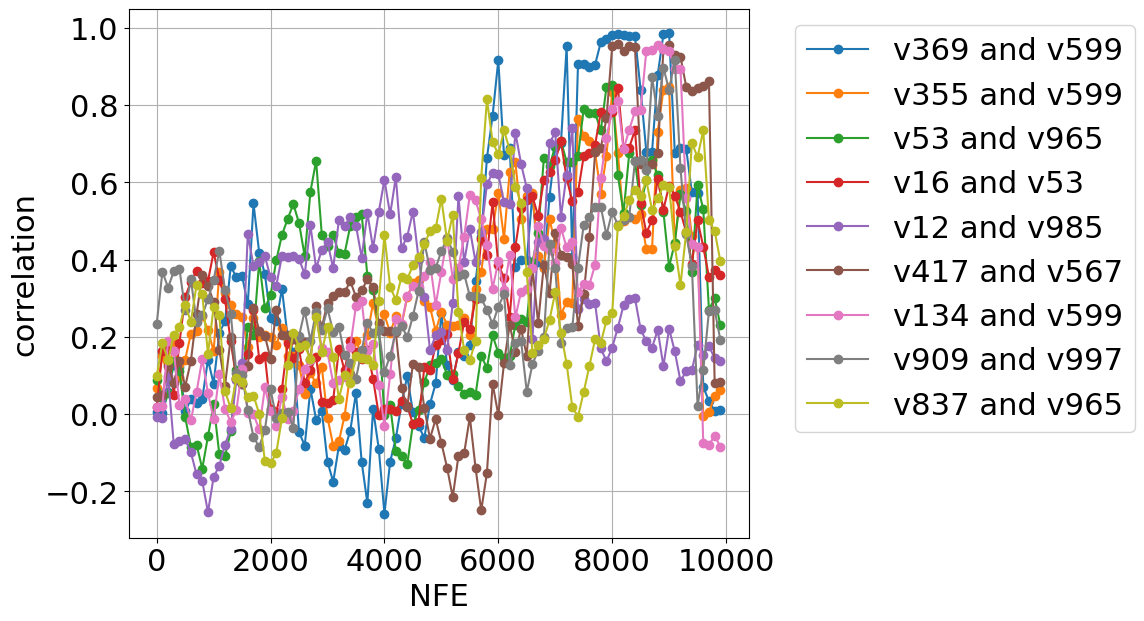

In [280]:
NFE=[]
plt.clf()
i=0
for i in range(100):
    NFE.append(i*100)

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size
j=0

print(dfmean[0:6])

for array in arrays:
#     for j in range(100):
    plt.plot(NFE, df[str(array)].to_numpy().tolist(), marker='o',label=str(array),linestyle="solid")
    j=j+1

plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('NFE')
plt.ylabel('correlation')
plt.show()

# 解の値の散布図

In [95]:
df_point1 = pd.read_csv("../../output/basic_sample2/various1000/DTLZ2/NSGAIII/0/8000369599history_point.csv", header=0, index_col=0, encoding="SHIFT-JIS")
df_point2 = pd.read_csv("../../output/basic_sample2/various1000/DTLZ2/NSGAIII/0/8000355599history_point.csv", header=0, index_col=0, encoding="SHIFT-JIS")
df_point3 = pd.read_csv("../../output/basic_sample2/various1000/DTLZ2/NSGAIII/0/800053965history_point.csv", header=0, index_col=0, encoding="SHIFT-JIS")

In [96]:
print(df_point1.columns[2])
arrays1=df_point2.iloc[1:,1]
arrays2=df_point2.iloc[1:,2]
df_point2

v369v599


,NFE,ITE,v355v599
8000.0,79.0,0.506948,0.418083
NaN,NaN,0.506835,0.418083
NaN,NaN,0.504985,0.418841
NaN,NaN,0.507648,0.418198
NaN,NaN,0.736255,0.664613
...,...,...,...
NaN,NaN,0.458860,0.417458
NaN,NaN,0.499248,0.417489
NaN,NaN,0.507954,0.418854
NaN,NaN,0.510900,0.417988


<Figure size 432x288 with 0 Axes>

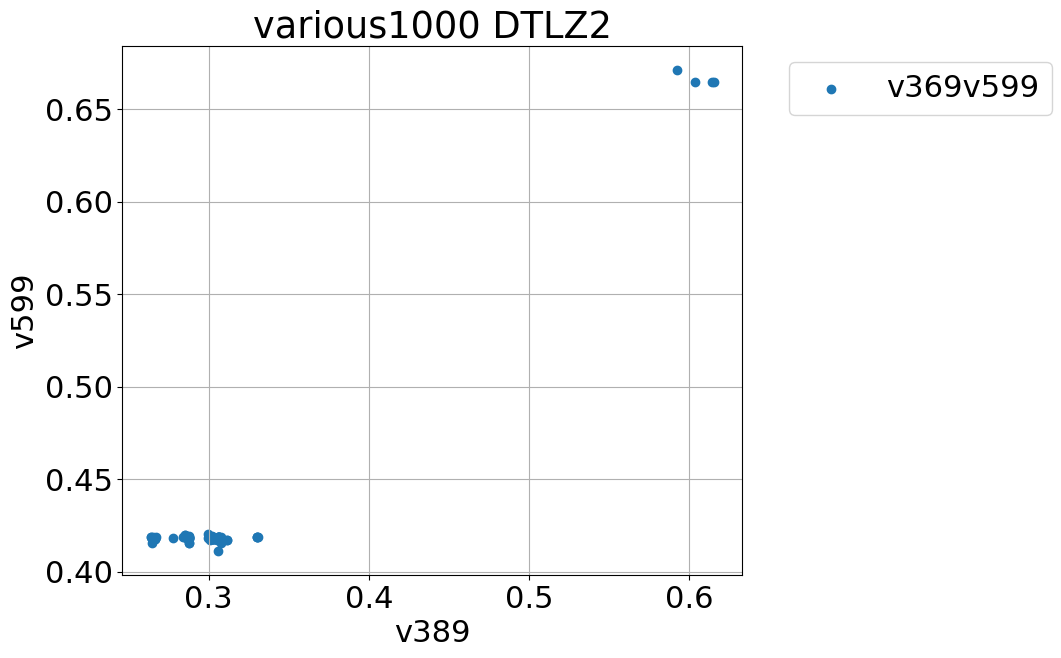

In [99]:
NFE=[]
plt.clf()
i=0
for i in range(100):
    NFE.append(i*100)

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size

arrays1=df_point1.iloc[1:,1]
arrays2=df_point1.iloc[1:,2]
plt.scatter(arrays1, arrays2, marker='o',label=str(df_point1.columns[2]))

# arrays1=df_point2.iloc[1:,1]
# arrays2=df_point2.iloc[1:,2]
# plt.scatter(arrays1, arrays2, marker='o',label=str(df_point2.columns[2]),color="orange")
 
# arrays1=df_point3.iloc[1:,1]
# arrays2=df_point3.iloc[1:,2]
# plt.scatter(arrays1, arrays2, marker='o',label=str(df_point3.columns[2]),color="green")

plt.grid()
plt.title("various1000 DTLZ2")

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('v389')
plt.ylabel('v599')
plt.show()

<Figure size 432x288 with 0 Axes>

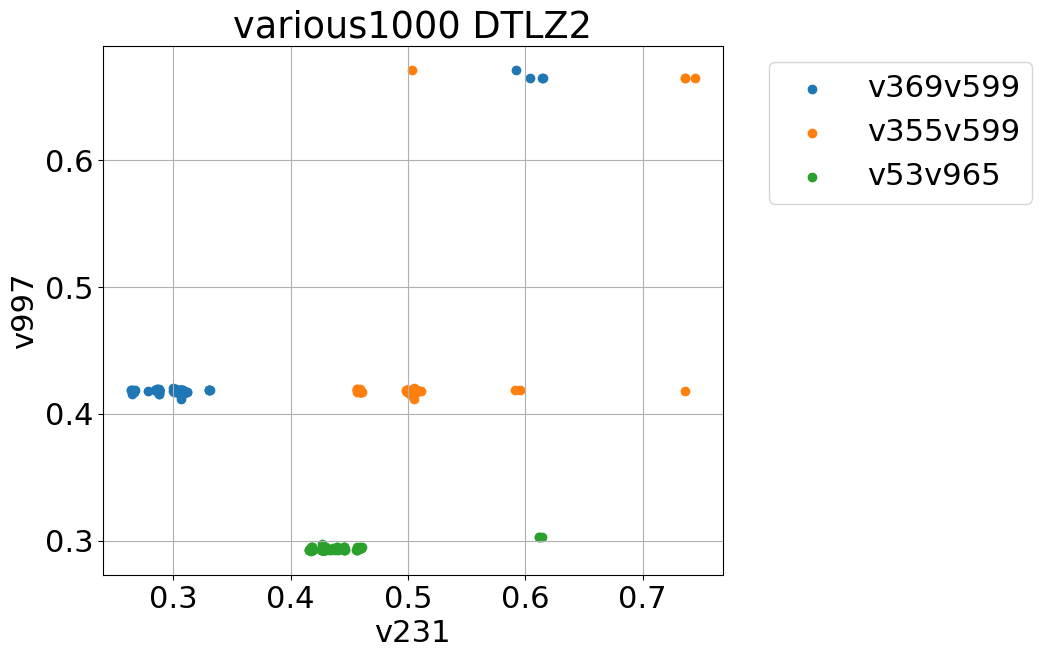

In [98]:
NFE=[]
plt.clf()
i=0
for i in range(100):
    NFE.append(i*100)

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size

arrays1=df_point1.iloc[1:,1]
arrays2=df_point1.iloc[1:,2]
plt.scatter(arrays1, arrays2, marker='o',label=str(df_point1.columns[2]))

arrays1=df_point2.iloc[1:,1]
arrays2=df_point2.iloc[1:,2]
plt.scatter(arrays1, arrays2, marker='o',label=str(df_point2.columns[2]))
 
arrays1=df_point3.iloc[1:,1]
arrays2=df_point3.iloc[1:,2]
plt.scatter(arrays1, arrays2, marker='o',label=str(df_point3.columns[2]))

plt.grid()
plt.title("various1000 DTLZ2")

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('v231')
plt.ylabel('v997')
plt.show()

13
13
0.0


In [205]:
dfmean = pd.read_csv("../../output/basic_sample2/various100/DTLZ4/NSGAIII/0/correlationmean.csv", header=0, encoding="SHIFT-JIS")
dfmean

,Unnamed: 0,0
0,ITE,49.500000
1,v383 and v895,0.312598
2,v28 and v275,0.285702
3,v546 and v799,0.284579
4,v34 and v806,0.272950
...,...,...
499496,v494 and v618,-0.143098
499497,v513 and v946,-0.150809
499498,v29 and v471,-0.151307
499499,v439 and v817,-0.152266


In [218]:
print(df)
dfs=df+df
print(dfs)

       ITE  v0 and v1  v0 and v2  v0 and v3  v0 and v4  v0 and v5  v0 and v6  \
NFE                                                                            
100      0  -0.079899   0.197602   0.017911  -0.129650   0.588826  -0.021127   
200      1  -0.067074   0.382063   0.357038  -0.118431   0.596199   0.101384   
300      2  -0.195561   0.370957   0.337649  -0.309641   0.330139  -0.038709   
400      3  -0.161711   0.488911   0.237528  -0.045358   0.456396  -0.167304   
500      4  -0.179740   0.554864   0.212475   0.057174   0.496014  -0.045196   
...    ...        ...        ...        ...        ...        ...        ...   
9600    95  -0.023130   0.157876  -0.000828   0.005599   0.006136  -0.047172   
9700    96   0.008843   0.235461   0.004924  -0.021156   0.059301   0.079434   
9800    97  -0.018425   0.170305   0.051619   0.104262   0.066567   0.194457   
9900    98  -0.018651   0.090672   0.073496   0.125079   0.037157   0.355142   
10000   99  -0.022182   0.094764   0.050

-0.0798995

In [225]:
first=True
for i in range(5):
    x = pd.read_csv("../../output/basic_sample2/various1000/DTLZ4/NSGAIII/"+str(i)+"/history_correlation.csv", header=0, index_col=0, encoding="SHIFT-JIS")
    if(first==True):
        dfs =x
        first=False
    else:
        dfs=dfs+x
    print(i)
print(dfs)

0
1
2
3
4
       ITE  v0 and v1  v0 and v2  v0 and v3  v0 and v4  v0 and v5  v0 and v6  \
NFE                                                                            
100      0   0.269732   0.287758   0.384045   0.369707   0.904281  -0.051378   
200      5   0.346120  -0.010929   0.760927   0.340998   0.766856   0.368222   
300     10   0.184697   0.587036   0.900960   0.443252   0.113011   0.032795   
400     15   0.606261   0.553093   0.554448   1.049428   0.768312   0.118812   
500     20   0.918874   0.892383   0.975556   2.007697   1.674698   0.283960   
...    ...        ...        ...        ...        ...        ...        ...   
9600   475   0.287018   0.700823   0.379390   0.589799   0.240543   0.015985   
9700   480   0.215807   0.676596  -0.146258   0.556795   0.325960   0.140269   
9800   485   0.031927   0.136648   0.044385   0.371956   0.130164   0.189300   
9900   490  -0.050905   0.248280  -0.073821   0.469355   0.356486   0.238600   
10000  495  -0.096106   0.0772

In [11]:
df = pd.read_csv("../../output/basic_sample2/various1000/DTLZ2/NSGAIII/0/objectives_point.csv", header=0, index_col=0, encoding="SHIFT-JIS")
df

,ITE,f0,f1,f2,Unnamed: 5
NFE,,,,,
100,0,3.595639,3.891769,6.170370,NaN
100,0,0.733526,3.170996,8.392411,NaN
100,0,2.720688,0.536606,7.966983,NaN
100,0,5.993557,5.630941,1.425430,NaN
100,0,2.361924,8.172734,2.036402,NaN
...,...,...,...,...,...
10000,99,0.099160,1.224330,0.707306,NaN
10000,99,1.112367,0.839177,0.372608,NaN
10000,99,0.807477,0.908585,0.897071,NaN


In [20]:
px1 = df.loc[1000,"f0"]
print(px1)


NFE
1000    0.003345
1000    7.822133
1000    7.475905
1000    4.133059
1000    2.397434
          ...   
1000    0.759897
1000    5.425368
1000    0.116624
1000    1.061918
1000    3.327923
Name: f0, Length: 74, dtype: float64


In [77]:
def plot3D_ND2(df1,df2,problem):
    px1 = df1.loc[10000,"f0"]
    py1 = df1.loc[10000,"f1"]
    pz1 = df1.loc[10000,"f2"]

    px2 = df2.loc[10000,"f0"]
    py2 = df2.loc[10000,"f1"]
    pz2 = df2.loc[10000,"f2"]    
    
    amax = max(max(px1), max(py1), max(pz1), max(px2), max(py2), max(pz2))
    
    fig = plt.figure(figsize=(14,7), dpi=100) # figure size
    plt.rcParams["font.size"] = 22 # whole font size
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(problem +" NSGA3",fontsize=18)
    azim, elev = ax.azim, ax.elev
    azim = -45
    ax.view_init(elev, azim)    
    
    ax.plot_surface(X, Y, Z, color = 'w', edgecolor='b', shade=False, rstride = 1, cstride = 1, alpha=0.5)
    ax.scatter(px1, py1, pz1, s=10, c='r',label="100")
    sc = ax.scatter(px2, py2, pz2, s=10, c='g',label="10000")
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('$f_1$', labelpad=15, fontsize=18)
    ax.set_ylabel('$f_2$', labelpad=15, fontsize=18)
    ax.set_zlabel('$f_3$', labelpad=15, fontsize=18)

    ax.set_xlim3d(0, amax)
    ax.set_ylim3d(amax, 0)
    ax.set_zlim3d(0, amax)
    
    plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0, fontsize=18)
    return fig

In [78]:
plot3D_ND2(df1,df2)

TypeError: plot3D_ND2() missing 1 required positional argument: 'problem'

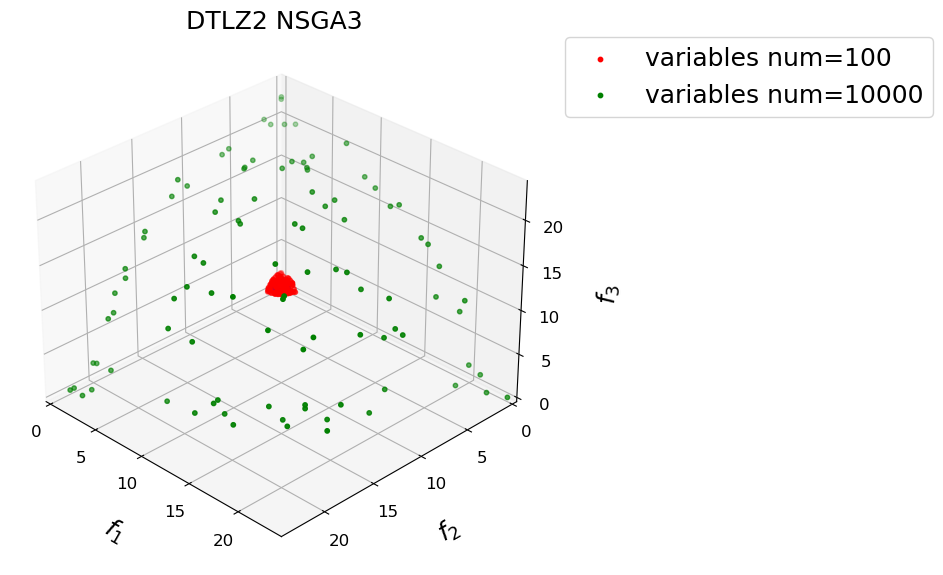

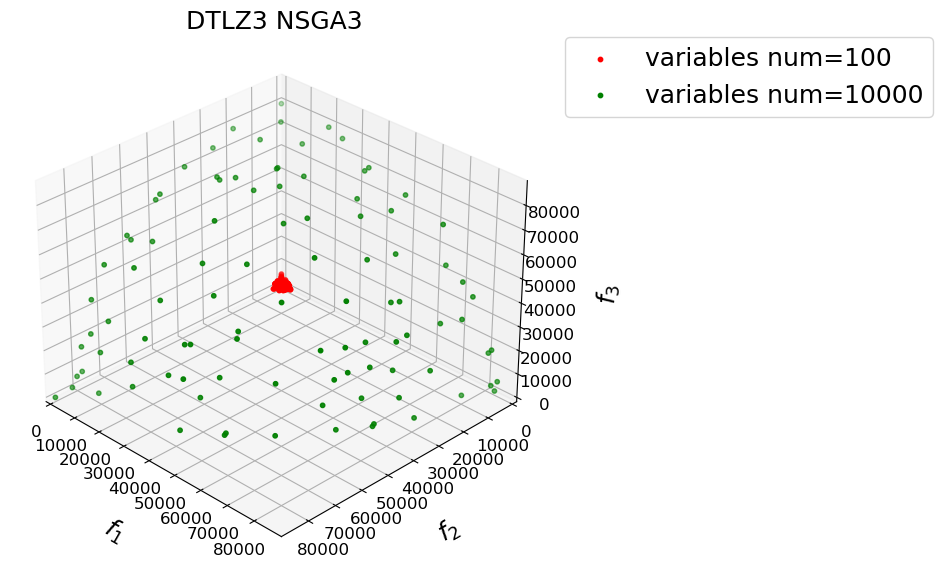

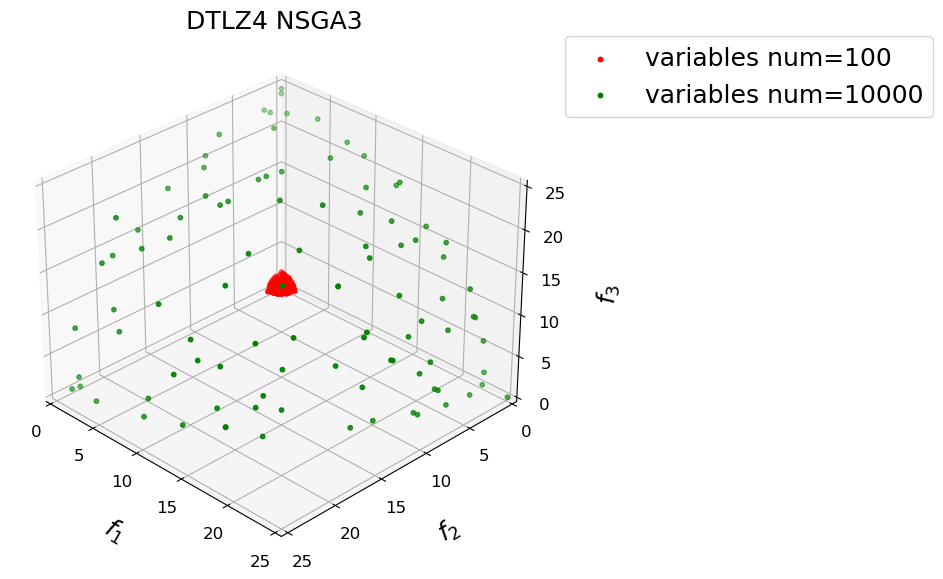

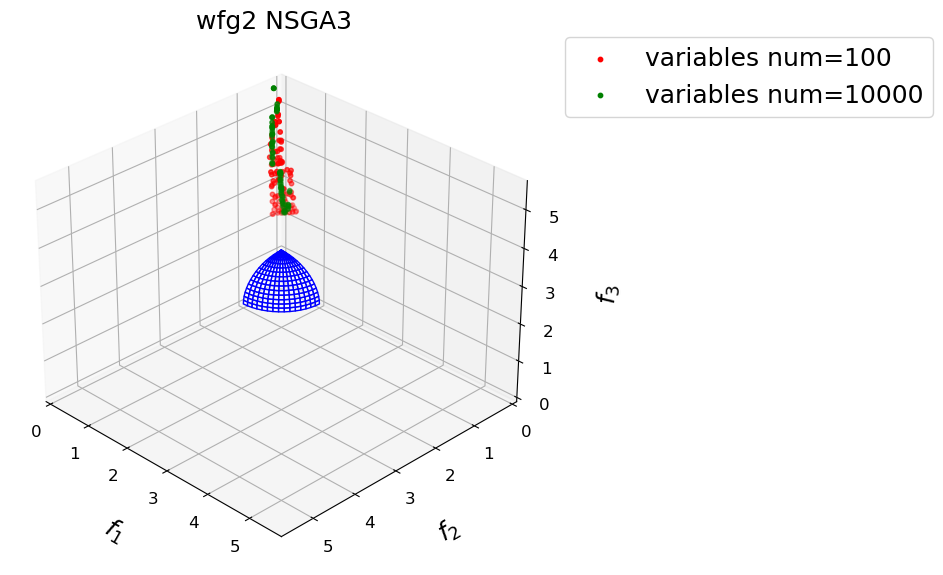

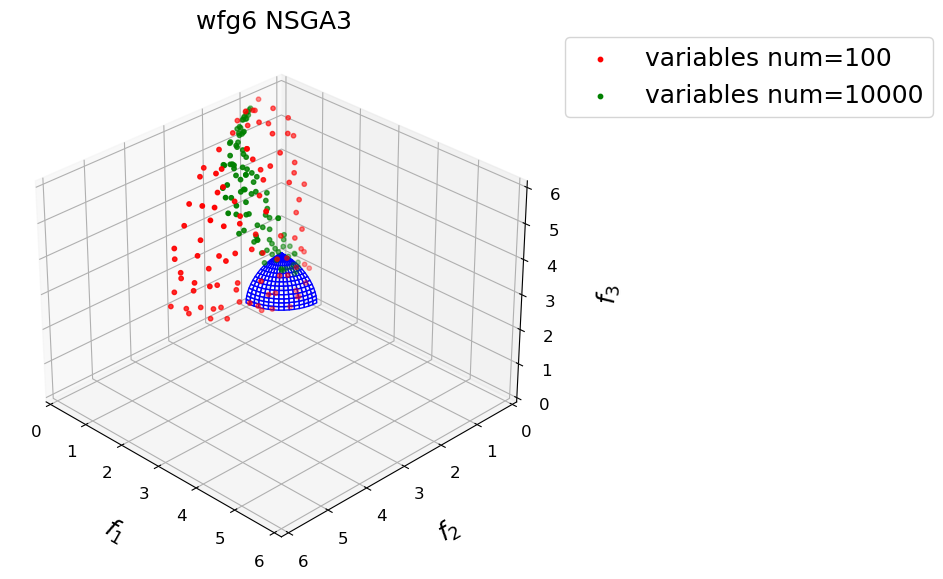

In [79]:
for problem in problemName:
    df1 = pd.read_csv("../../output/basic_sample2/various100/"+problem+"/NSGAIII/0/objectives_point.csv", header=0, index_col=0, encoding="SHIFT-JIS")
    df2 = pd.read_csv("../../output/basic_sample2/various1000/"+problem+"/NSGAIII/0/objectives_point.csv", header=0, index_col=0, encoding="SHIFT-JIS")
    plot3D_ND2(df1,df2,problem)

# 設計変数の推移図

In [121]:
df = pd.read_csv("../../output/basic_sample2/various1000/DTLZ2/NSGAIII/0/history_various.csv", header=0, index_col=0, encoding="SHIFT-JIS")
df

,ITE,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v990,v991,v992,v993,v994,v995,v996,v997,v998,v999
NFE,,,,,,,,,,,,,,,,,,,,,
100,0,0.381277,0.455342,0.469227,0.494567,0.487379,0.490088,0.485387,0.544379,0.451491,...,0.495712,0.499359,0.460351,0.563390,0.443506,0.464075,0.548520,0.427417,0.511147,0.520009
200,1,0.347816,0.478241,0.435532,0.477414,0.512666,0.466928,0.463069,0.500474,0.470997,...,0.511624,0.496949,0.427454,0.529197,0.411714,0.453786,0.526414,0.413750,0.504681,0.503968
300,2,0.331103,0.487109,0.412749,0.461183,0.508094,0.503313,0.459308,0.460578,0.458426,...,0.522202,0.460029,0.408898,0.530008,0.413559,0.435155,0.502666,0.422156,0.493876,0.459862
400,3,0.337295,0.505695,0.446140,0.418805,0.473125,0.498616,0.514939,0.431503,0.516147,...,0.531176,0.460157,0.397855,0.571983,0.376704,0.389037,0.543194,0.422628,0.528020,0.483212
500,4,0.340870,0.508966,0.417385,0.456622,0.512632,0.514598,0.503956,0.428189,0.486076,...,0.534253,0.417519,0.396260,0.565376,0.385692,0.385349,0.520518,0.407085,0.496364,0.484765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600,95,0.377436,0.527686,0.430916,0.443487,0.604034,0.444444,0.401855,0.362652,0.554451,...,0.439491,0.525438,0.219666,0.489256,0.423418,0.217819,0.397192,0.602183,0.552546,0.511430
9700,96,0.378501,0.532029,0.437325,0.441844,0.604361,0.446741,0.401692,0.363868,0.554573,...,0.439069,0.525391,0.220365,0.490903,0.416656,0.217823,0.413972,0.604606,0.552264,0.512174
9800,97,0.377124,0.522389,0.446823,0.442241,0.604309,0.445851,0.402129,0.364574,0.554533,...,0.438762,0.525445,0.220382,0.491864,0.434109,0.217682,0.414213,0.601251,0.554531,0.511653


ITE              49.500000
v383 and v895     0.312598
v28 and v275      0.285702
v546 and v799     0.284579
v34 and v806      0.272950
v131 and v936     0.272946
dtype: float64
[355, 599]


<Figure size 432x288 with 0 Axes>

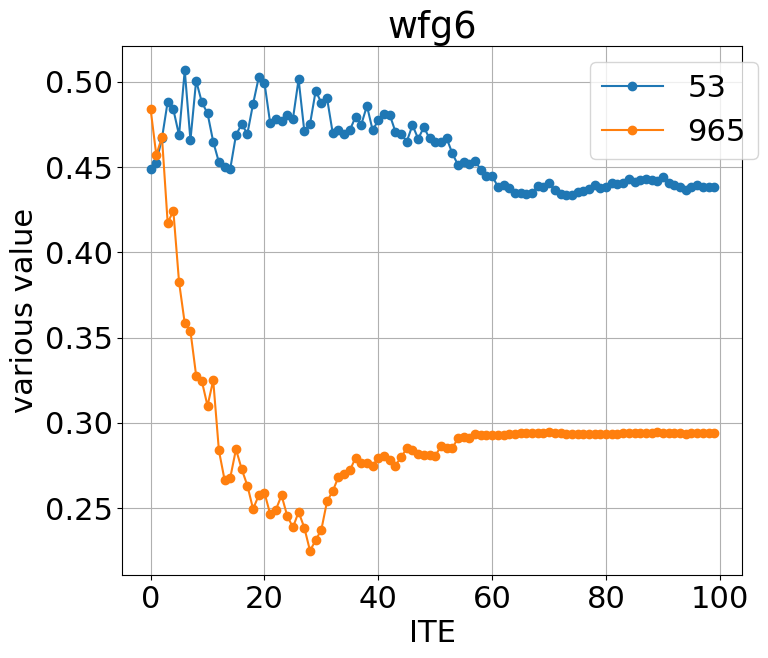

In [125]:
ITE=[]
plt.clf()
i=0
for i in range(100):
    ITE.append(i*1)

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size
j=0

print(dfmean[0:6])
print(arrays)
arrays=[53,965]
for array in arrays:
#     for j in range(100):
    plt.plot(ITE, df["v"+str(array)].to_numpy().tolist(), marker='o',label=str(array),linestyle="solid")
    j=j+1

plt.title("wfg6")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('ITE')
plt.ylabel('various value')
plt.show()